# Exploratory Data Analysis

The Questions before starting the EDA are as follows: <br>
1) How many people boarded from different Home Planets ? <br>
2) Distribution of people off-boarding for different locations ? <br>
3) How many the Cabin allotment were done for the people with respect to "Port & "Starboard" ? <br>
4) How many people were in Cryosleep Cabin ? <br>
5) What Age group of people were present in Space Titanic ? <br>
6) What are the total income generated for different Space Services ? <br>
7) What is the total Income generated by people on-boarded from different Home Planets ? <br>
8) Which Cabin side used which service maximum ? <br>
9) What is the different service expnenses done by different Age Group people during the voyage ? <br>
10) What is the total expenses incurred by VIP & Non-VIP people ? <br>
11) Which Cabin allocation was provided maximum to VIPs ? <br>
12) Which is the maximum Home to Destination travel ? <br>

In [ ]:
! source spaceenv/bin/activate

In [1]:
# Importing Liraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Defining Data Loading funtion by passwing the path of the data
def data_load(data_path):
    df = pd.read_csv(data_path)

    return df

In [3]:
data = data_load('/home/meghal/Personal/Personal Projects/Space Titanic/Data/cleaned_training_data.csv')
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Type
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Train
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Train
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Train
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Train
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Earth,False,F/1796/S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0,True,Test
12855,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,True,Test
12856,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,True,Test
12857,Mars,True,D/296/P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,True,Test


In [4]:
data['Cabin'] = data.Cabin.apply(lambda x: x.split('/')[2])
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Type
0,Europa,False,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Train
1,Earth,False,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Train
2,Europa,False,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Train
3,Europa,False,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Train
4,Earth,False,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Earth,False,S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0,True,Test
12855,Earth,True,S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,True,Test
12856,Earth,False,P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,True,Test
12857,Mars,True,P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,True,Test


# Lets Begin

## Question 1:

### How many people boarded from different Home Planets ?

## Question 2:

### Distribution of people off-boarding for different locations ?

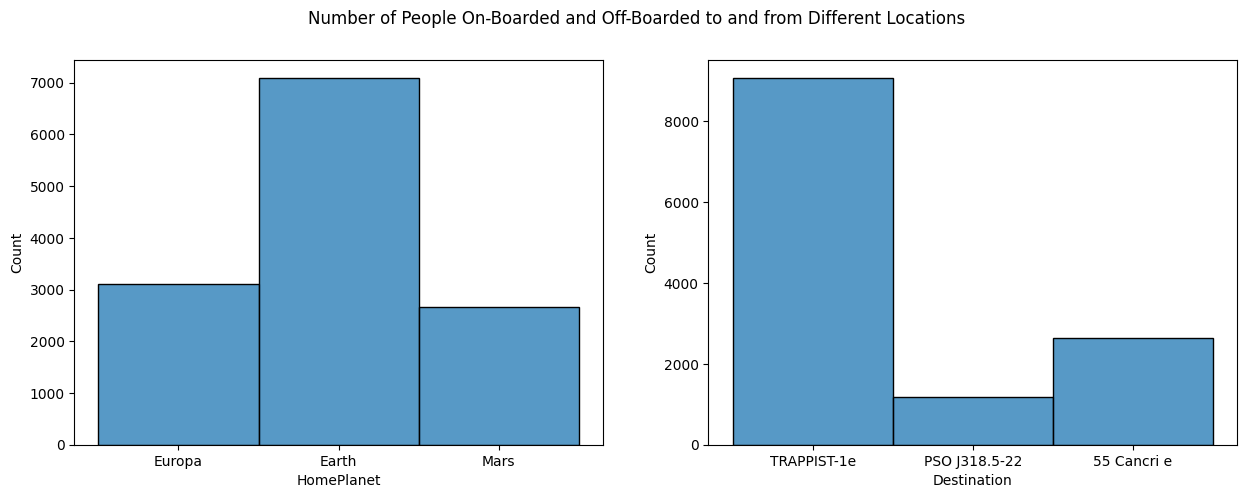

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of People On-Boarded and Off-Boarded to and from Different Locations')
sns.histplot(data, x='HomePlanet', ax=axes[0])
sns.histplot(data, x='Destination', ax=axes[1])
plt.show()
fig.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Number of People On-Boarded and Off-Boarded to and from Different Locations.jpg')


## Question 3:

### How many the Cabin allotment were done for the people with respect to "Port & "Starboard" ?

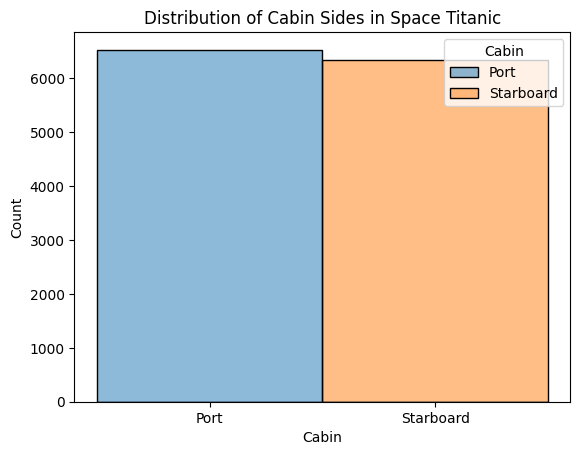

In [6]:
data['Cabin'] = data['Cabin'].map({'P':'Port', 'S':'Starboard'})
sns.histplot(data, x='Cabin', hue='Cabin').set_title('Distribution of Cabin Sides in Space Titanic')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Cabin Sides in Space Titanic.jpg')

## Queestion 4:

### How many people were in Cryosleep Cabin ?

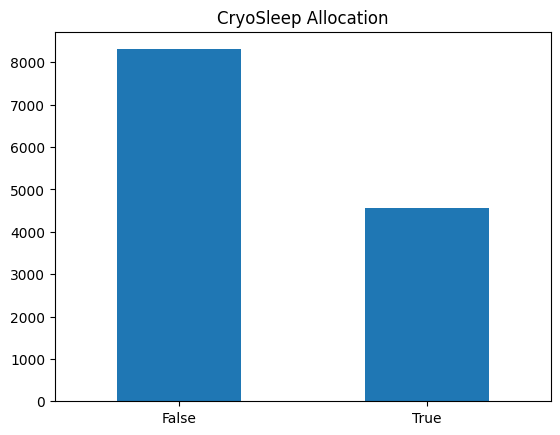

In [7]:
data.CryoSleep.value_counts().plot(kind='bar').set_title('CryoSleep Allocation')
plt.xticks(rotation=0)
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/CryoSleep Allocation.jpg')

## Question 5:

### What Age group of people were present in Space Titanic ?

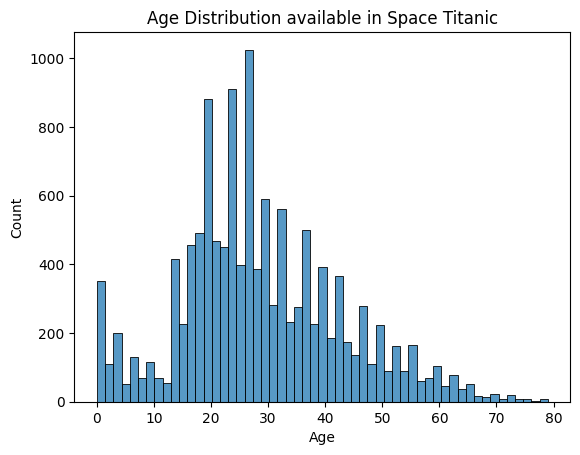

In [8]:
sns.histplot(data, x='Age').set_title('Age Distribution available in Space Titanic')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Age Distribution available in Space Titanic.jpg')

## Question 6:

### What are the total income generated for different Space Services ?

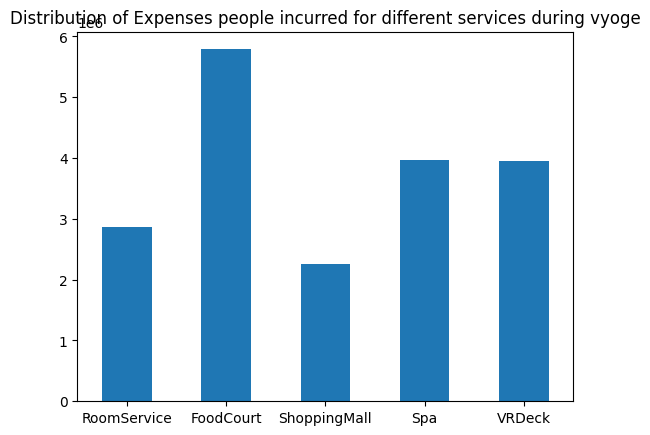

In [9]:
data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].apply(lambda x: x.sum()).plot(kind='bar').set(title='Distribution of Expenses people incurred for different services during vyoge')
plt.xticks(rotation=0)
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Expenses people incurred during vyoge.jpg')

## Question 7:

### What is the total Income generated by people on-boarded from different Home Planets ?

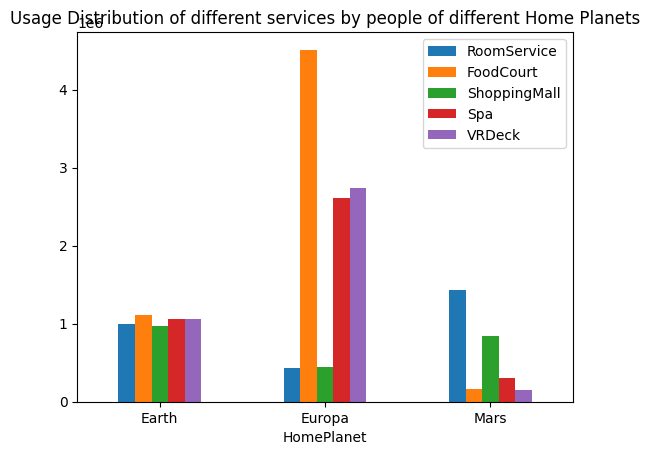

In [10]:
data.groupby('HomePlanet')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum().plot(kind='bar').set_title('Usage Distribution of different services by people of different Home Planets')
plt.xticks(rotation=0)
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Usage Distribution of different services by people of different Home Planets.jpg')

## Question 8:

### Which Cabin side used which service maximum ?

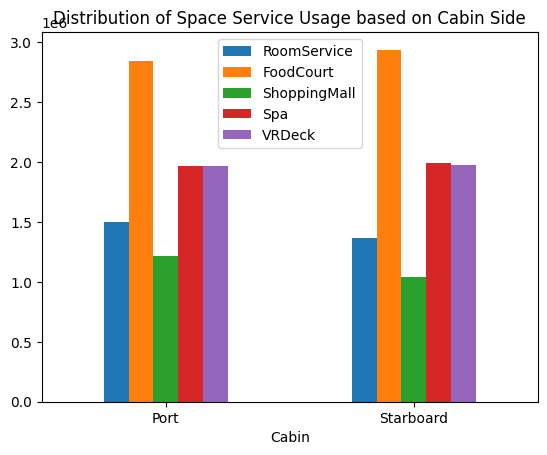

In [11]:
data.groupby('Cabin')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum().plot(kind='bar').set_title('Distribution of Space Service Usage based on Cabin Side')
plt.xticks(rotation=0)
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Space Service Usage based on Cabin Side.jpg')

## Question 9:

### What is the different service expnenses done by different Age Group people during the voyage ?

/tmp/ipykernel_8876/3252091479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_service['AgeBins'] = pd.cut(age_service.Age, age_bins)


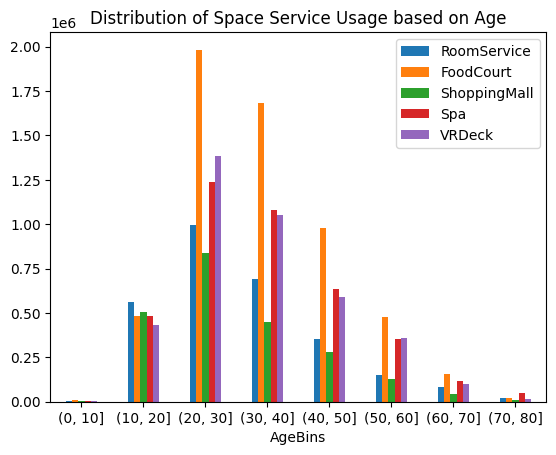

In [12]:
age_service = data[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_service['AgeBins'] = pd.cut(age_service.Age, age_bins)
age_service = age_service.drop('Age', axis='columns')
age_service.groupby('AgeBins')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum().plot(kind='bar').set_title('Distribution of Space Service Usage based on Age')
plt.xticks(rotation=0)
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Space Service Usage based on Age.jpg')

## Question 10:

### What is the total expenses incurred by VIP & Non-VIP people ?

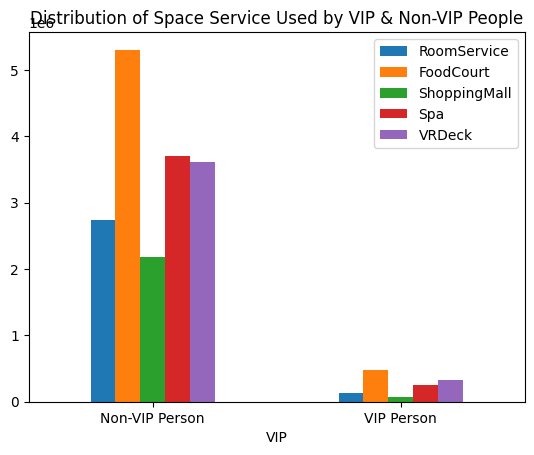

In [13]:
data['VIP'] = data.VIP.apply(lambda x: 'VIP Person' if(x) else 'Non-VIP Person')
data.groupby('VIP')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum().plot(kind='bar').set_title('Distribution of Space Service Used by VIP & Non-VIP People')
plt.xticks(rotation=0)
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Space Service Used by VIP & Non-VIP People.jpg')

## Question 11:

### Which Cabin allocation was provided maximum to VIPs ?

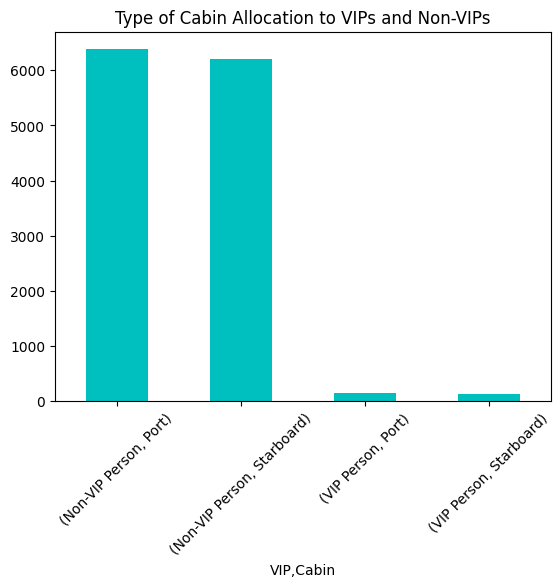

In [14]:
data.groupby('VIP')['Cabin'].value_counts().plot(kind='bar',color='c').set_title('Type of Cabin Allocation to VIPs and Non-VIPs')
plt.xticks(rotation=45)
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Type of Cabin Allocation to VIPs and Non-VIPs.jpg')

## Question 12:

### Which is the maximum Home to Destination travel ?

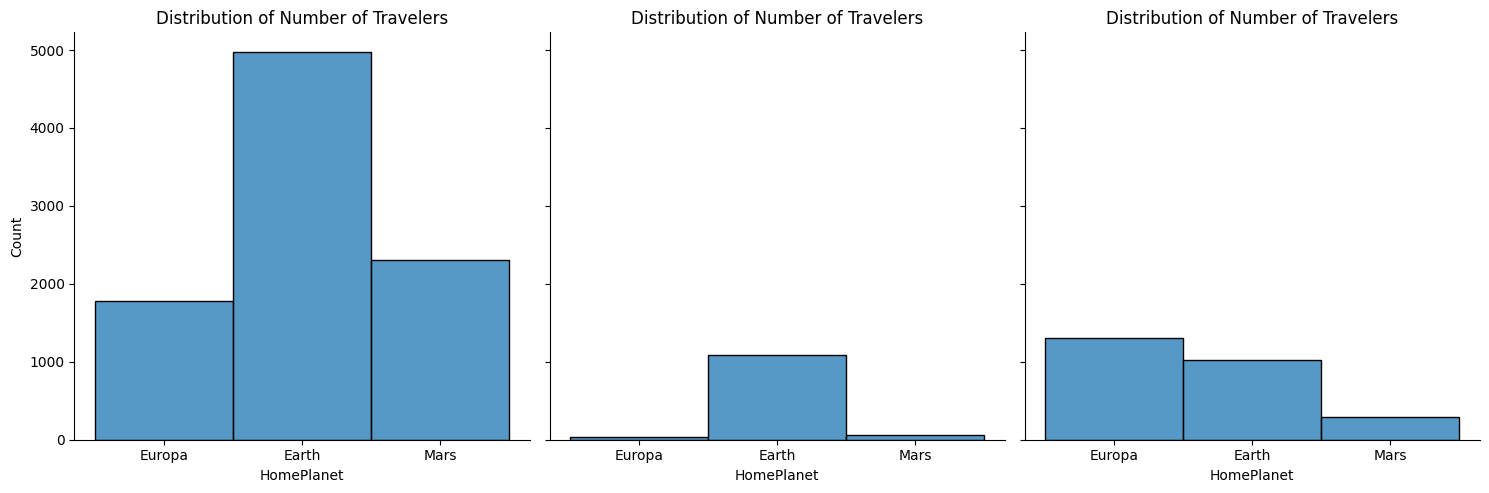

In [15]:
sns.displot(data, x='HomePlanet', col='Destination').set(title='Distribution of Number of Travelers')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Number of Travelers for different Home Planet to Destination.jpg')

In [16]:
! pip freeze > requirements.txt